# Simple Linear Regression
## Muhammad Rofi Ariansyah
## 41155050210066

In [1]:
import pandas as pd

pizza ={'diameter': [6, 8, 10, 14, 18],
        'harga': [7, 9, 13, 17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


## Visualisasi Data

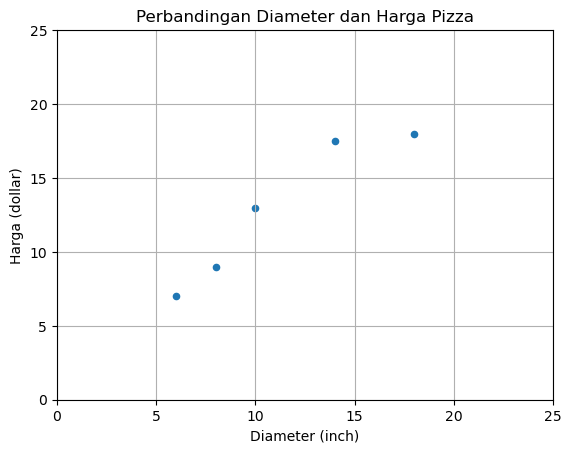

In [25]:
import matplotlib.pyplot as plt
pizza_df.plot(kind = 'scatter', x = 'diameter', y = 'harga')
 
plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

## Penyesuaian Data Set

In [3]:
# Penerapan simple linear Programming
# Penyesuaian Data set
import numpy as np

x = np.array(pizza_df['diameter']) # features
y = np. array(pizza_df['harga']) # target

print(f'x: {x}')
print(f'y: {y}')

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [4]:
x = x.reshape(-1, 1)
x.shape
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

## Training Model Linier Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

## Visualisasi Simple Linear Regression Model

In [27]:
x_vis = np.array([0,25]).reshape(-1,1)
y_vis =  model.predict(x_vis)

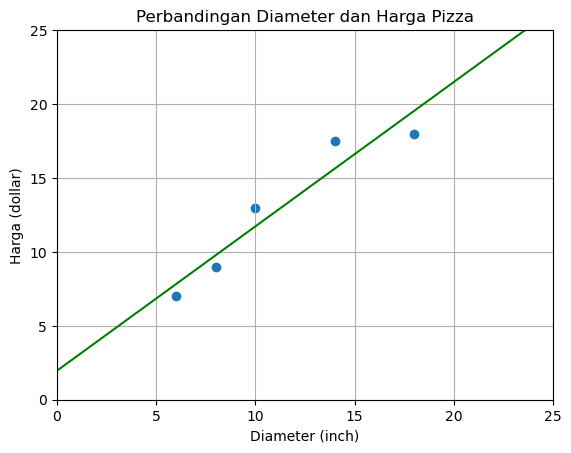

In [7]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-g')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [8]:
print(f'intercept: {model.intercept_}') # nilai alpha
print(f'slope: {model.coef_}') # Nilai Beta

intercept: 1.965517241379315
slope: [0.9762931]


## Mencari Nilai Slope

In [28]:
print(f'x: \n {x}\n')
print(f'x flatten : {x.flatten()}\n')
print(f'y: {y}')

x: 
 [[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten : [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


## Variance

In [29]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


## Covariance

In [30]:
np.cov(x.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [12]:
covariance_xy = np.cov(x.flatten(),y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 22.65


## Slope

In [31]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 0.9762931034482758


## Mencari Nilai Intercept

In [32]:
intercept = np.mean(y)- slope * np.mean(x)
print(f'intercept: {intercept}') 

intercept: 1.9655172413793114


## Prediksi Harga Pizza

In [33]:
diameter_pizza = np.array([12,20,23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [16]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [17]:
for dmtr, hrg in zip (diameter_pizza, prediksi_harga):
    print(f'Diamter : {dmtr} prediksi harga : {hrg}')

Diamter : [12] prediksi harga : 13.681034482758621
Diamter : [20] prediksi harga : 21.491379310344826
Diamter : [23] prediksi harga : 24.42025862068965


## Training dan Testing Dataset

In [34]:
X_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

X_test = np.array([8,9,11,16,12,]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

## Training Simple Linear Regression Model

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# Evaluasi Linear Regression Model dengan Cofficient of Determination atau R-Squared
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Nilai R-squred semakain mendekati 1 maka akan semakin baik bgtu pula sebaliknya

R-squared: 0.6620052929422553


In [21]:
# Mencari nilai R-squred
# SS_res
ss_res = sum ([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
               for x_i, y_i in zip(X_test, y_test)])
print(f'ss_res : {ss_res}')

ss_res : 19.1980993608799


In [22]:
# SS_tot
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test]) 
print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [23]:
# R-squared
r_squared  = 1- (ss_res / ss_tot)
print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553
